In [1]:
import drawSvg as draw
import math

class Body:
    def __init__(self, mass, x,y, vx,vy, pixel_radius,r,g,b): #build the constructor
        self.mass=mass
        self.x=x
        self.y=y
        self.vx=vx
        self.vy=vy
        self.radius=pixel_radius 
        self.color='#%02x%02x%02x' % (r,g,b)
        
    def update_velocity(self, ax, ay, timestep): #update the velocity of the body
        self.vx=ax*timestep+self.vx
        self.vy=ay*timestep+self.vy
        
    def update_position(self, timestep): #update the positon of the body based on updated velocity
        self.x=self.x+timestep*self.vx
        self.y=self.y+timestep*self.vy
    
    def draw(self, pixels_per_meter): #draw the body
        self.pixel_x=self.x*pixels_per_meter
        self.pixle_y=self.y*pixels_per_meter
        D.append(draw.Circle(self.pixel_x,self.pixle_y,self.radius,fill = self.color))



In [2]:
class System:
    def __init__(self, body_list): #build the constructor 
        self.body_list=body_list
    
    def compute_acceleration(self,n): #calculate the accumulated acceleartion in the x direction and y direction
        ax=0 #start ax from 0
        ay=0 #start ay from 0
        G=6.67384e-11
        for i in range(len(self.body_list)):
            if i != n:
                dx=self.body_list[i].x-self.body_list[n].x #compute the distance in x
                dy=self.body_list[i].y-self.body_list[n].y #compute the distance in y
                distance=math.sqrt(dx**2+dy**2) #compute the total distance
                a=(G*self.body_list[i].mass)/distance**2 #compute a
                ax=ax+a*dx/distance #accumulate ax
                ay=ay+a*dy/distance #accumulate ay
        return (ax,ay)
        
    def draw(self, pixels_per_meter): #draw the body for every body in the system
        for n in range(len(self.body_list)):
            self.body_list[n].draw(pixels_per_meter)
        
    def update(self, timestep): #update the velocity and position for every body in the system
        for n in range(len(self.body_list)):
            acceleration=self.compute_acceleration(n) #get the value of ax,ay by calling compute_acceleration
            self.body_list[n].update_velocity(acceleration[0], acceleration[1], timestep) 
            self.body_list[n].update_position(timestep) 

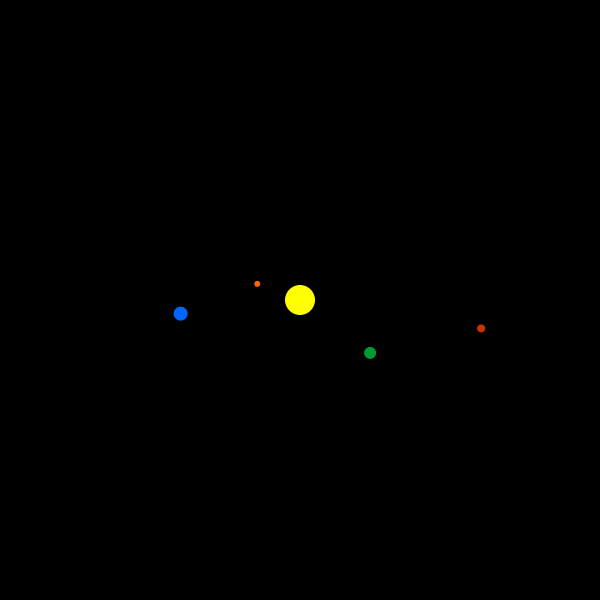

KeyboardInterrupt: 

In [3]:
AU = 1.49598e11 # number of meters per astronomical unit
EM = 5.9736e24  # mass of the Earth in kilograms

TIME_SCALE = 3.0e6              # how many real seconds for each second of simulation
PIXELS_PER_METER = 120. / AU    # distance scale for the simulation

FRAME_RATE = 30
TIMESTEP = 1.0 / FRAME_RATE     # time between drawing each frame

# Solar system data comes from
#   http://hyperphysics.phy-astr.gsu.edu/hbase/solar/soldata2.html
sun     = Body(1.98892e30, 0, 0, 0, 0, 15, 255, 255, 0)
mercury = Body(.06 * EM, -.3871 * AU, 0, 0, 47890, 3, 255, 102, 0)
venus   = Body(.82 * EM, -.7233 * AU, 0, 0, 35040, 6, 0, 153, 51)
earth   = Body(1.0 * EM, -1.0 * AU, 0, 0, 29790, 7, 0, 102, 255)
mars    = Body(.11 * EM, -1.524 * AU, 0, 0, 24140, 4, 204, 51, 0)
    
solar_system = System([sun, mercury, venus, earth, mars])

def draw_frame():
    solar_system.draw(PIXELS_PER_METER)
    solar_system.update(TIMESTEP * TIME_SCALE)
    return( D )

with draw.animate_jupyter(draw_frame, delay=0.05) as anim:
    while( True ):
        D = draw.Drawing(600, 600, origin='center') # clear canvas
        D.append( draw.Rectangle(-300,-300,600,600,fill='black')) # black background
        anim.draw_frame()